# ResultAnalysis
Notebook to check Grid Search results

In [1]:
import os
from working_dir import set_wd
set_wd()
os.getcwd()

'/Users/tales.pimentel/ds/kaggle/football-match-prediction'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from src.dao import dao_ml
from src.utils import dflib, stats, pretties, plot, plot_domain, palette

In [3]:
pretties.max_data_frame_columns()

# Loading Results

In [4]:
all_results = dao_ml.load_all_modeling()
print(len(all_results))

pd.DataFrame(all_results)[["id_modeling", "datetime", "clf_name", "pipeline_train_stages", "best_score_cv_train", "best_score_cv"]].sort_values("datetime", ascending=False)

4


,id_modeling,datetime,clf_name,pipeline_train_stages,best_score_cv_train,best_score_cv
0,62e46782-8f32-488e-9fec-19923681d8ea,2022-05-26 21:04:41,RandomForestClassificationModel,"[VectorAssembler, StringIndexerModel]",0.981549,1.012594
3,a26f990a-12e8-4a8d-9e2e-74e4969f6508,2022-05-26 19:02:06,RandomForestClassificationModel,"[VectorAssembler, StringIndexerModel]",0.981899,1.012797
1,d6e238c1-c6a8-41be-ac18-3cad3f47a420,2022-05-26 16:44:32,XGBClassifier,[StringIndexerModel],0.996144,1.010365
2,6d671cab-ea98-4471-8455-0a8092241123,2022-05-26 15:52:32,RandomForestClassificationModel,"[VectorAssembler, StringIndexerModel]",0.982310,1.012607


In [5]:
load_ids_modeling = ["62e46782-8f32-488e-9fec-19923681d8ea"]

rdf = pd.DataFrame()

for id_modeling in load_ids_modeling:
    results_temp = dao_ml.load_modeling(id_modeling)
    
    rdf_id = pd.DataFrame(results_temp["overfitting_analysis_df"])
    rdf_id["clf_name"] = results_temp["clf_name"]
    
    rdf = rdf.append(rdf_id)

In [6]:
rdf = rdf.sort_values("log_loss_cv")
rdf.head(5)

,log_loss_train,log_loss_cv,numTrees,maxDepth,subsamplingRate,clf_name
21,0.981549,1.012594,60,10,0.5,RandomForestClassificationModel
23,0.980488,1.012637,60,10,0.7,RandomForestClassificationModel
22,0.981000,1.012746,60,10,0.6,RandomForestClassificationModel
11,0.980874,1.013042,40,10,0.7,RandomForestClassificationModel
9,0.982029,1.013099,40,10,0.5,RandomForestClassificationModel


In [7]:
def overfitting_analysis_num(metrics_df, param_name, metric_colname):
    metric_colname_train = metric_colname + "_train"
    metric_colname_valid = metric_colname + "_cv"
    
    of_data = metrics_df.groupby(param_name)[[metric_colname_train, metric_colname_valid]].mean().reset_index()

    display(of_data)
    
    title = f"{metric_colname} mean values for {param_name}"
    
    plt.figure(figsize=(8,5))
    plt.scatter(of_data[param_name], of_data[metric_colname_train], label="train", s=130, alpha=0.6)
    plt.scatter(of_data[param_name], of_data[metric_colname_valid], label="cv", s=130, alpha=0.6)
    plt.title(label=title)
    plt.xlabel(param_name)
    plt.ylabel(metric_colname)
    plt.legend()
    plt.show()

# <font color=blue>RandomForestClassificationModel</font>

#### <font color=black>subsamplingRate</font>

,subsamplingRate,log_loss_train,log_loss_cv
0,0.5,1.007691,1.018678
1,0.6,1.007674,1.018816
2,0.7,1.007635,1.018865


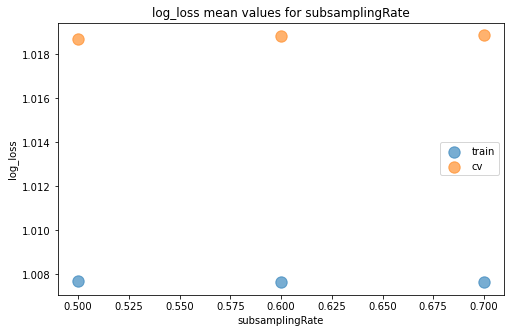

#### <font color=black>maxDepth</font>

,maxDepth,log_loss_train,log_loss_cv
0,4,1.028799,1.029445
1,6,1.016651,1.018983
2,8,1.003987,1.013795
3,10,0.981230,1.012922


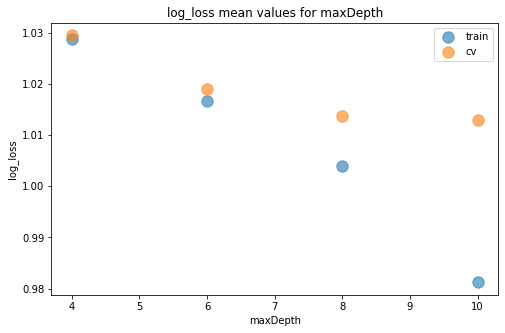

#### <font color=black>numTrees</font>

,numTrees,log_loss_train,log_loss_cv
0,40,1.007849,1.018986
1,60,1.007484,1.018586


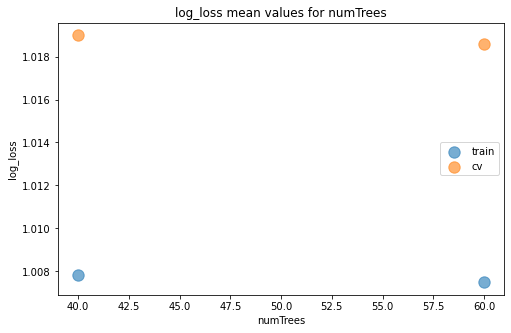

In [8]:
pretties.md("RandomForestClassificationModel", size="#", color="blue")
rfc_df = rdf[rdf["clf_name"] == "RandomForestClassificationModel"]

for param_name in ["subsamplingRate", "maxDepth", "numTrees"]:
    pretties.md(param_name, size="####")
    overfitting_analysis_num(metrics_df=rfc_df, 
                             param_name=param_name, 
                             metric_colname="log_loss")

In [9]:
pretties.md("XGBClassifier", size="#", color="blue")
xgbc_df = rdf[rdf["clf_name"] == "XGBClassifier"]

for param_name in ["colsample_bytree", "max_depth", "n_estimators", "subsample"]:
    pretties.md(param_name, size="####")
    overfitting_analysis_num(metrics_df=xgbc_df, 
                             param_name=param_name, 
                             metric_colname="log_loss")

# <font color=blue>XGBClassifier</font>

#### <font color=black>colsample_bytree</font>

KeyError: 'colsample_bytree'